# Table 2. 
## Pearson correlation coefficient between image-expression axes (IEAs) and COPD-related characteristics and health outcomes.

In [1]:
import numpy as np
import sys
sys.path.append("../../src/")
import utility
import pandas as pd

from matplotlib import pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

from scipy.stats import kruskal
from statsmodels.stats.proportion import proportions_chisquare

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib

import statsmodels.api as sm

from scipy import stats

import pandas as pd

import math


# Loading data

In [2]:
df_IEA_train = pd.read_csv("../../output/IEA_train.csv").set_index("sid")
df_IEA_test = pd.read_csv("../../output/IEA_test.csv").set_index("sid")



In [3]:
df = utility.load_data()
covariances = ["Age_P2", "gender", "race", 
               "smoking_status_P2", 
               "BMI_P2", "ATS_PackYears_P2",
               "FEV1pp_utah_P2", "FEV1_FVC_utah_P2", 
               "SGRQ_scoreTotal_P2", "MMRCDyspneaScor_P2", 
               "distwalked_P2", "Frequent_Exacerbator_P2",
               "Perc15_Insp_Thirona_P2","pctEmph_Thirona_P2", "pctGasTrap_Thirona_P2", "Pi10_Thirona_P2", 
               "WallAreaPct_seg_Thirona_P2", "perc15_ratio", 
               "delta_FEV1pp_P2P3", "delta_FEV1FVC_P2P3",
               "Frequent_Exacerbator_P3", "5-year Mortality_P2", 
           ] 



/ocean/projects/asc170022p/juc91/anaconda/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/ocean/projects/asc170022p/juc91/anaconda/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/ocean/projects/asc170022p/juc91/anaconda/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [4]:
# Change the variable names
cov_label = [iii.replace("Frequent_Exacerbator_P2", "Frequent Exacerbator (History)")\
             .replace("Frequent_Exacerbator_P3", "Frequent Exacerbator (Future)")\
             .replace("smoking_status_P2", "%Current Smoker").replace("_P2", "").replace("P3", "")\
             .replace("ATS_", "").replace("_Thirona", "").replace("FEV1pp_utah", "FEV$_1$%predicted")\
             .replace("FEV1_FVC_utah", "FEV$_1$/FVC").replace("distwalked", "6-Minute-Walk Distance").replace("pctEmph", "%Emphysema at -950HU")\
             .replace("Perc15_Insp", "perc15").replace("pctGasTrap", "%Gas Trapping").replace("gender", "Gender, %females")\
             .replace("race", "Race, %African-American").replace("PackYears", "Pack Years").replace("WallAreaPct_seg", "%WA segmental")\
             .replace("BMI", "Body Mass Index (BMI)").replace("Pi10", "Pi10").replace("SGRQ_scoreTotal", "SGRQ Total Score")\
             .replace("MMRCDyspneaScor", "mMRC Dyspnea Score")\
             .replace("FEV1pp", "FEV$_1$%predicted").replace("FEV1FVC", "FEV$_1$/FVC").replace("WApct", "%WA segmental")\
             .replace("delta_", "$\Delta$")\
             .replace("perc15_ratio", "$Q_{perc15_{peel-core}}$")
             for iii in covariances]

# Computing the correlation coefficients

In [5]:
df_used = pd.merge(df[covariances], df_IEA_test, left_index = True, right_index = True)
corr_coef = df_used.corr()[["IEA0", "IEA1"]].to_numpy()
corr_coef = np.around(corr_coef, 2)

cov_label += ["IEA$_{emph}$", "IEA$_{airway}$"]

# Generating the Table

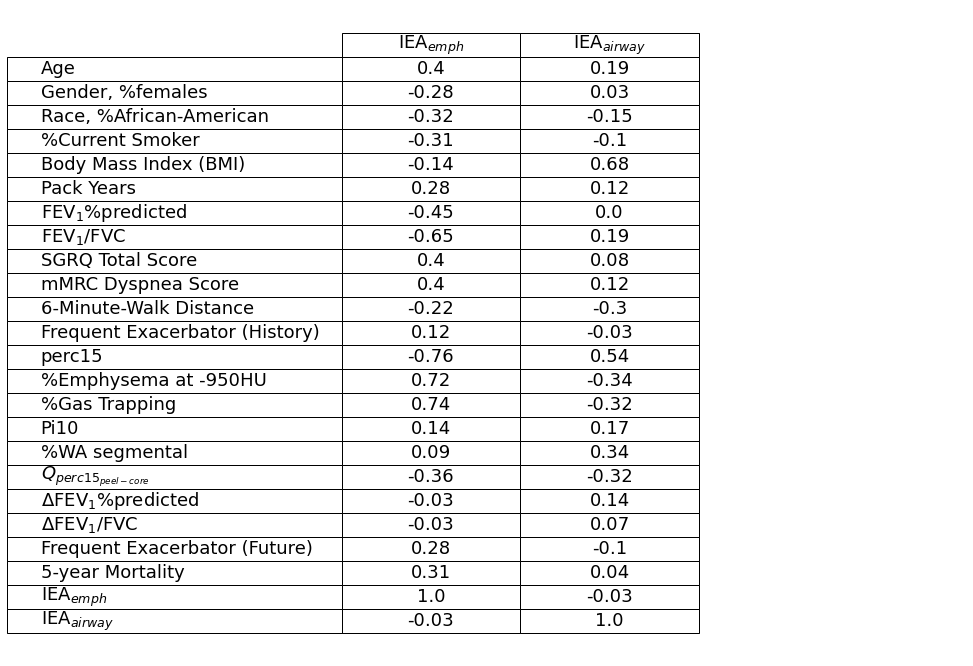

In [6]:
fig, ax = plt.subplots(figsize=(16,12))

the_table=plt.table(cellText=corr_coef, rowLabels=cov_label, 
                    colLabels = ["IEA$_{emph}$", "IEA$_{airway}$"],
                     colWidths = [.1]*corr_coef.shape[1], loc='center', fontsize = 50, cellLoc = "center"
                   )

plt.axis('off')

the_table.auto_set_font_size(False)
the_table.set_fontsize(18)
the_table.scale(2, 2)